# Rotating cylinders

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
x = np.linspace(-1.40, 1.40, 129)
y = np.linspace(-1.40, 1.40, 129)

solver = ib.Solver(x, y, iRe=1.0, Co=0.75)

## Immersed boundaries

In [4]:
innerCyl = ib.shapes.cylinder("innerCyl", 0, 0, 0.5, solver.dxmin)
outerCyl = ib.shapes.cylinder("outerCyl", 0, 0, 1.0, solver.dxmin)

solver.set_solids(innerCyl, outerCyl)

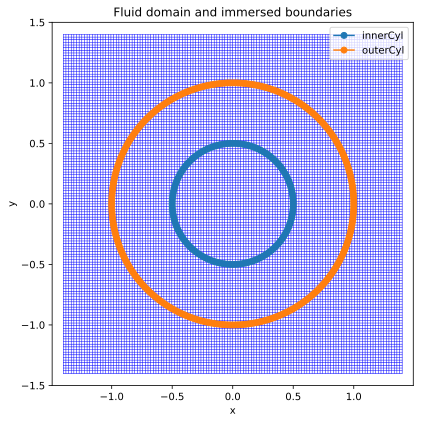

In [5]:
solver.plot_domain()

## Boundary conditions

In [6]:
uBC, vBC = solver.zero_boundary_conditions()

uI, vI = -2*solver.solids[0].η, 2*solver.solids[0].ξ
uO, vO = np.zeros(solver.solids[1].l), np.zeros(solver.solids[1].l)
sBC = ((uI, vI), (uO, vO))

## Steady simulation

In [7]:
x0, = solver.steps(solver.zero(), uBC, vBC, sBC, number=1)

  step      t        residual   innerCyl(fx) innerCyl(fy) outerCyl(fx) outerCyl(fy) 
     1    0.000359 1.000000e+00  0.000000000  0.000000000 -0.000000000 -0.000000000 


In [9]:
%time x, *_ = solver.steady_state(x0, uBC, vBC, sBC, maxit=10, checkJacobian=True)

  step  residual(x)  residual(f) innerCyl(fx) innerCyl(fy) outerCyl(fx) outerCyl(fy) 
     1 2.478610e+00 1.612549e+00 -0.000000000 -0.000000000  0.000000000 -0.000000000 
     2 1.517530e-01 2.596384e-03 -0.000000000  0.000000000  0.000000000 -0.000000000 
     3 1.231816e-05 2.879965e-10 -0.000000000  0.000000000  0.000000000 -0.000000000 
     4 1.681519e-09 9.662492e-16 -0.000000000  0.000000000  0.000000000 -0.000000000 
CPU times: user 46.3 s, sys: 1.66 s, total: 48 s
Wall time: 1.9 s


## Display results

Plot velocity components and pressure.

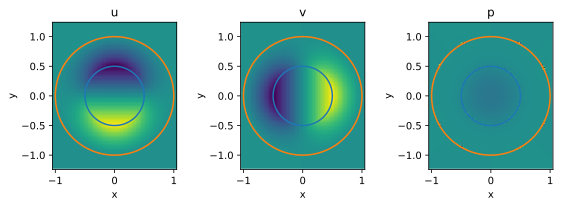

In [10]:
solver.plot_field(x, xlim=(-1, 1), ylim=(-1, 1))

Check results against analytical solution

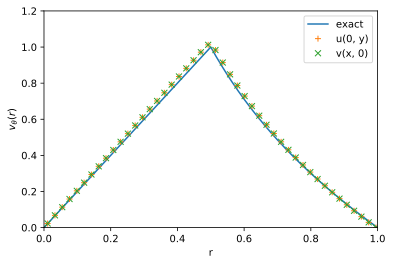

In [11]:
def vθ(r, w1, R1, R2):
    """Return azimuthal velocity."""
    if np.abs(r)<=R1:
        return w1*r
    elif R1<=np.abs(r)<=R2:
        return -R1**2*w1/(R2**2-R1**2)*r + w1/(R2**2-R1**2)*R1**2*R2**2/r
    else:
        return 0

u, v = solver.reshape(*solver.unpack(x))[:2]

r = np.linspace(0, 1, 257)
plt.plot(r, [-vθ(yk, -2.0, 0.5, 1.0) for yk in r], label='exact')
plt.plot(solver.fluid.u.y, -u[:, solver.fluid.u.shape[1]//2], '+', label='u(0, y)');
plt.plot(solver.fluid.v.x, v[solver.fluid.v.shape[0]//2], 'x', label='v(x, 0)');

plt.xlabel('r')
plt.ylabel('$v_θ(r)$')
plt.xlim(0, 1)
plt.ylim(0, 1.2)
plt.legend();